First 5 rows of raw data:
   Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        6496            6.1              0.26         0.25             2.9   
1        6495            6.8              0.26         0.34            15.1   
2        6467           11.6              0.58         0.66             2.2   
3        6468           10.4              0.61         0.49             2.1   
4        6470           10.4              0.44         0.42             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.047                289.0                 440.0  0.99314  3.44   
1      0.060                 42.0                 162.0  0.99705  3.24   
2      0.074                 10.0                  47.0  1.00080  3.25   
3      0.200                  5.0                  16.0  0.99940  3.16   
4      0.145                 34.0                  48.0  0.99832  3.38   

   sulphates  alcohol           quality   type  
0    

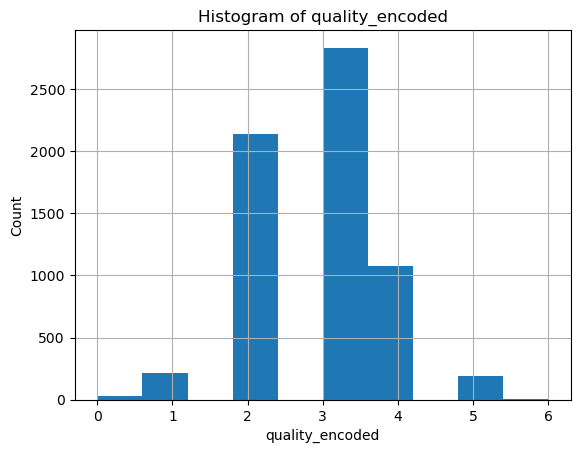

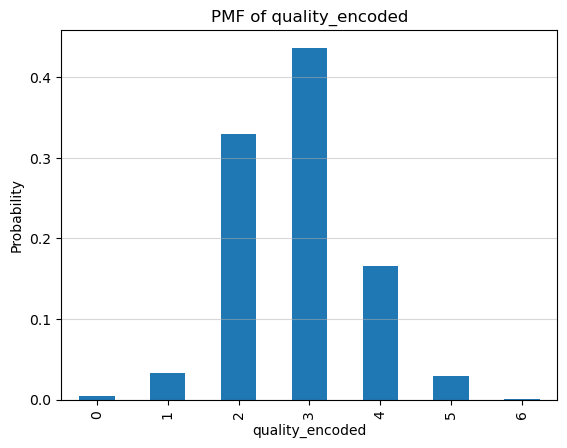

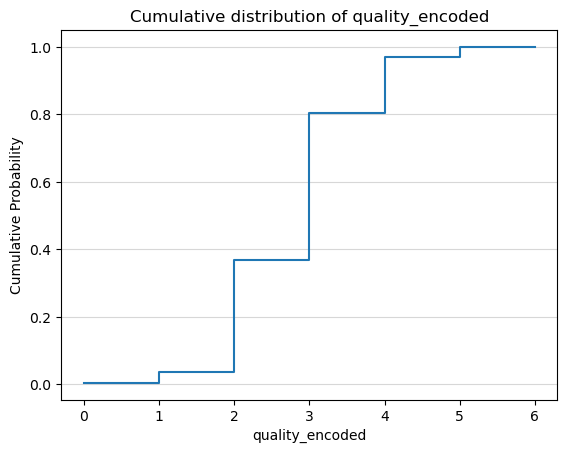

In [1]:
from data_acquisition import DataAcquisition

da = DataAcquisition(r"C:\Users\govor\anaconda_projects\0d779c97-41ae-4743-8a08-902a13153742\wine_quality.csv")
df = da.open_data()

# Optional: visualizations
da.plot_histogram("quality_encoded")
da.plot_pmf("quality_encoded")
da.plot_cumulative("quality_encoded")


In [2]:
from data_acquisition import DataAcquisition
from data_model import DataModel

# 1. Load data
da = DataAcquisition(r"C:\Users\govor\anaconda_projects\0d779c97-41ae-4743-8a08-902a13153742\wine_quality.csv")
df = da.open_data()

# 2. Build model
model = DataModel(df, target="quality_encoded")

# 3. Split into train, validation, test
train, val, test = model.split_data(train_ratio=0.7, val_ratio=0.15)

# 4. Train model
features = ["alcohol", "volatile acidity", "sulphates", "type_encoded"]
model.fit_linear_regression(features)

# 5. Predict and evaluate on validation set
y_val_true = val["quality_encoded"].to_numpy().reshape(-1, 1)
y_val_pred = model.predict(val, features)
mse_val = model.mse(y_val_true, y_val_pred)
print("Validation MSE:", mse_val)

# 6. Predict and evaluate on test set
y_test_true = test["quality_encoded"].to_numpy().reshape(-1, 1)
y_test_pred = model.predict(test, features)
mse_test = model.mse(y_test_true, y_test_pred)
print("Test MSE:", mse_test)


First 5 rows of raw data:
   Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        6496            6.1              0.26         0.25             2.9   
1        6495            6.8              0.26         0.34            15.1   
2        6467           11.6              0.58         0.66             2.2   
3        6468           10.4              0.61         0.49             2.1   
4        6470           10.4              0.44         0.42             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.047                289.0                 440.0  0.99314  3.44   
1      0.060                 42.0                 162.0  0.99705  3.24   
2      0.074                 10.0                  47.0  1.00080  3.25   
3      0.200                  5.0                  16.0  0.99940  3.16   
4      0.145                 34.0                  48.0  0.99832  3.38   

   sulphates  alcohol           quality   type  
0    

In [3]:
print("Model weights (w):")
print(model.w)


Model weights (w):
[[-0.08213194]
 [ 0.31458696]
 [-1.6707763 ]
 [ 0.47406876]
 [-0.11919043]]


In [4]:
# Create the model object
model = DataModel(df, target="quality_encoded")

# Split the dataset into train, validation, and test
train, val, test = model.split_data(train_ratio=0.7, val_ratio=0.15)


✅ Data split complete:
Train: (4547, 16)  Val: (974, 16)  Test: (976, 16)


In [5]:
# Choose numeric features
features = ["alcohol", "volatile acidity", "sulphates", "type_encoded"]

# 🔹 Task 2.7: Fit linear regression on ALL data
model.fit_linear_regression_on_all(features)

# 🔹 Task 2.2: Fit linear regression on TRAIN data
model.fit_linear_regression(features)

# 🔹 Task 2.9: Evaluate MSE on validation and test
mse_val = model.evaluate_mse_on_split("val", features)
mse_test = model.evaluate_mse_on_split("test", features)
print("Validation MSE:", mse_val)
print("Test MSE:", mse_test)


✅ Linear regression trained on ALL data. Weights shape: (5, 1)
✅ Linear regression trained on TRAIN. Weights shape: (5, 1)
Validation MSE: 0.5650500839105147
Test MSE: 0.5619686127867883


In [6]:
# Train a small neural network
nn, history = model.build_and_train_nn(
    features=features,
    hidden_units=(16, 8),  # number of neurons in layers
    epochs=20,
    batch_size=32,
    verbose=1
)

# Predict on validation data
y_val_pred_nn = model.nn_predict(val, features)
mse_val_nn = model.mse(val["quality_encoded"], y_val_pred_nn)
print("Validation MSE (NN):", mse_val_nn)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2978 - val_loss: 7.7064
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5505 - val_loss: 6.9988
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8592 - val_loss: 6.3473
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2225 - val_loss: 5.7481
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6351 - val_loss: 5.1958
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0952 - val_loss: 4.6891
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5999 - val_loss: 4.2265
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1463 - val_loss: 3.8037
Epoch 9/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7339 - val_loss: 3.4204
Epoch 10/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3581 - val_loss: 3.0725
Epoch 11/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0180 - val_loss: 2.7593
Epoch 12/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [8]:
!pip install scikit-learn

In [9]:
# Fit K-Means clustering
model.fit_kmeans(features, n_clusters=3)
print(model.df[["kmeans_label"]].head())

# Fit Gaussian Mixture Model (GMM)
model.fit_gmm(features, n_components=3)
print(model.df[["gmm_label"]].head())


K-Means fitted. Labels stored in df['kmeans_label'].
   kmeans_label
0             0
1             0
2             1
3             1
4             1
GMM fitted. Labels stored in df['gmm_label'].
   gmm_label
0          2
1          2
2          0
3          0
4          1


In this project, I tried different machine learning methods to predict the quality of wine and understand my data better. Each method works in a different way and is useful for different reasons.

Linear regression was my first model. It is very simple and easy to understand. It tries to draw a straight line between the features (like alcohol or acidity) and the quality of wine. It is a good starting point, but it cannot find more complicated patterns in the data.

Then I built a neural network. This model is more powerful and can find complex, non-linear relationships between the features and wine quality. It gave better results (lower MSE) than linear regression, but it was harder to understand and needed more time to train.

I also used K-Means and GMM, which are unsupervised learning methods. They do not predict wine quality directly. Instead, they group similar wines together. K-Means puts each wine into one group, while GMM shows the probability that a wine belongs to each group. These methods help me see patterns in the data that I didn’t notice before.

I learned that using validation data is important because it shows how well the model works on new, unseen data. Linear regression is easy and clear but not very flexible. Neural networks are stronger but more complex. K-Means and GMM help to explore the data and can also be used with supervised models to improve them.

Overall, this project showed me how different machine learning methods can be used together. Starting with simple models and then moving to more advanced ones helped me understand the data and improve the predictions.

I have used AI to help me to correct erros in code. 